# 總市值前100名的虛擬貨幣

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# 將爬蟲偽裝成Browser
url = "https://www.coingecko.com/zh-tw"
url_headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}
r = requests.get(url, headers = url_headers)
print(r.status_code)  # status code為200，表示網頁回應正確

200


In [3]:
# 剖析網頁元素，將我們要抓取的資料取出
soup = BeautifulSoup(r.text, "lxml")
table = soup.find(attrs={"class":"sort table mb-0 text-sm text-lg-normal table-scrollable"})

In [4]:
# 將tag <tr>的資料出
trs = table.tbody.find_all("tr")
df = []
columnName = ['#','貨幣','代號', '匯率','1小時','24小時','7天','24小時交易量','總市值']
# 以form迴圈將資料逐筆取出
for tr in trs:
    tds = tr.find_all("td")
    tmp = []
    for idx in range(10):
        if (idx == 2):
            tmp.append(tds[idx].find_all("span")[1].string)
            tmp.append(tds[idx].find_all("span")[2].string)  
        elif (idx != 0 and idx != 8):
            tmp.append(tds[idx].span.string)     
    df.append(tmp)    
# 將資料轉為DataFrame，秀出前10筆
df = pd.DataFrame(df, columns = columnName)
print("總筆數:", len(df))
df.head(10)    # 顯示前10筆

總筆數: 100


,#,貨幣,代號,匯率,1小時,24小時,7天,24小時交易量,總市值
0,1,比特幣,BTC,"$10,370.59",0.95%,-0.26%,0.83%,"$21,302,466,441","$184,938,805,601"
1,2,以太幣,ETH,$216.45,0.55%,-1.2%,-4.7%,"$7,166,914,050","$23,158,586,614"
2,3,瑞波幣,XRP,$0.321191,0.68%,-0.98%,4.8%,"$1,387,725,382","$13,765,482,662"
3,4,萊特幣,LTC,$94.03,0.82%,-3.4%,5.1%,"$2,918,341,736","$5,900,307,153"
4,5,比特現金,BCH,$310.45,0.82%,-0.87%,10%,"$1,501,388,201","$5,561,251,822"
5,6,幣安幣,BNB,$30.76,1.8%,3.8%,8.2%,"$359,869,796","$4,274,493,476"
6,7,柚子幣,EOS,$4.09,1.1%,-3.3%,-0.38%,"$2,339,119,688","$4,159,823,355"
7,8,泰達幣,USDT,$1.00,0.12%,0.050%,-0.14%,"$37,331,266,515","$3,565,735,570"
8,9,Bitcoin SV,BSV,$167.43,0.22%,-0.13%,30%,"$642,851,937","$2,998,499,253"
9,10,波場,TRX,$0.02861212,0.20%,3.9%,13%,"$885,771,191","$1,891,718,276"


In [9]:
df_10 = df.head(10)
coin = df_10['代號']
rate = df_10['匯率']
rate = [float(r.replace("$", "").replace(",","")) for r in rate]

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
mpl.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
mpl.rcParams["axes.unicode_minus"] = False

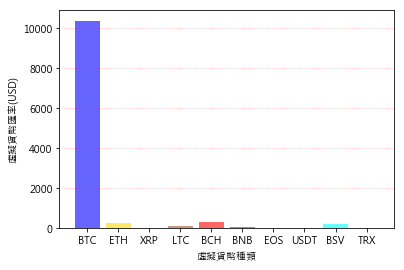

In [19]:
# plot
colors = ["blue", "gold", "darkgreen", "sienna", "red", "m", "violet", "blueviolet", "cyan", "cyan"]

plt.bar(coin, rate, align="center", color=colors, tick_label=coin, alpha=0.6)

plt.xlabel("虛擬貨幣種類")
plt.ylabel("虛擬貨幣匯率(USD)")

plt.grid(True, axis="y", ls=":", color="r", alpha=0.3)

plt.show()